# Using VGG16 for Image classification

In [1]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
%matplotlib inline
import os
from PIL import Image
from tensorflow.keras.utils import plot_model
import warnings

warnings.filterwarnings("ignore")

In [4]:
folder_path = 'C:/Users/vaish/Downloads/Data/animals/'

print('Total cats images:', len(os.listdir(folder_path + 'cats')))
print('Total dogs images:', len(os.listdir(folder_path + 'dogs')))
print('Total pandas images:', len(os.listdir(folder_path + 'panda')))


Total cats images: 1000
Total dogs images: 1000
Total pandas images: 1000


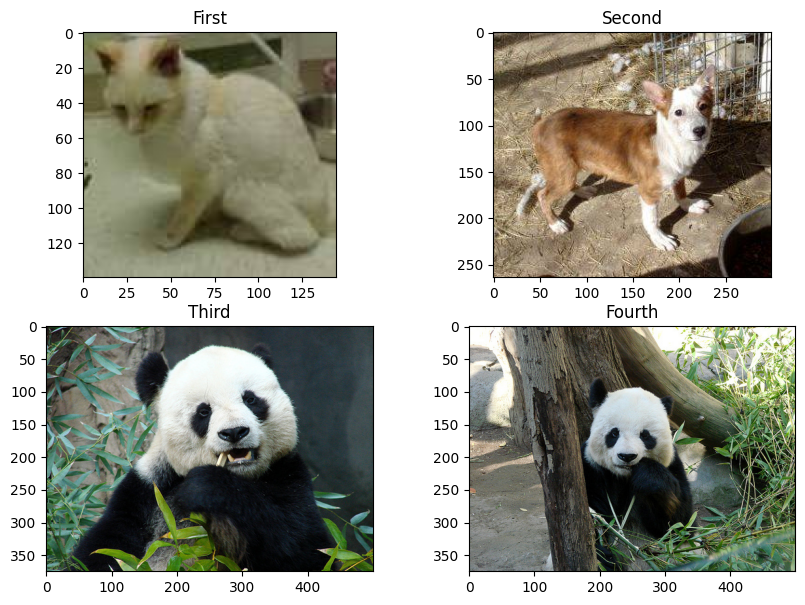

In [5]:

fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

Image1 = Image.open(folder_path + 'cats/cats_00011.jpg')
Image2 = Image.open(folder_path + 'dogs/dogs_00011.jpg')
Image3 = Image.open(folder_path + 'panda/panda_00101.jpg')
Image4 = Image.open(folder_path + 'panda/panda_00203.jpg')

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.title("First")

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.title("Second")

fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.title("Third")

fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.title("Fourth")

plt.show()


In [6]:

train_datagen = ImageDataGenerator(
    fill_mode='nearest',
    validation_split=0.1
)

# Train, validation, and test splits
train_generator = train_datagen.flow_from_directory(
    folder_path,
    target_size=(108, 108),
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    folder_path,
    target_size=(108, 108),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation'
)

test_generator = train_datagen.flow_from_directory(
    folder_path,
    target_size=(108, 108),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation'
)


Found 2700 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [7]:

model = tf.keras.models.Sequential([
    VGG16(input_shape=(108, 108, 3), include_top=False),
])
for layer in model.layers:
    layer.trainable = False

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 1, 1, 64)          294976    
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 15,014,019
Trainable params: 299,331
Non-t

In [8]:
# Visualize the model
plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
%%time
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    verbose=1
)

Epoch 1/25
85/85 [==============================] - 141s 2s/step - loss: 2.1935 - accuracy: 0.7474 - val_loss: 0.5338 - val_accuracy: 0.8800
Epoch 2/25
85/85 [==============================] - 123s 1s/step - loss: 0.4819 - accuracy: 0.8804 - val_loss: 0.3837 - val_accuracy: 0.9000
Epoch 3/25
85/85 [==============================] - 104s 1s/step - loss: 0.2578 - accuracy: 0.9185 - val_loss: 0.3082 - val_accuracy: 0.9033
Epoch 4/25
85/85 [==============================] - 115s 1s/step - loss: 0.1927 - accuracy: 0.9367 - val_loss: 0.3537 - val_accuracy: 0.9100
Epoch 5/25
85/85 [==============================] - 122s 1s/step - loss: 0.1000 - accuracy: 0.9644 - val_loss: 0.3159 - val_accuracy: 0.9233
Epoch 6/25
85/85 [==============================] - 138s 2s/step - loss: 0.1069 - accuracy: 0.9637 - val_loss: 0.3767 - val_accuracy: 0.9000
Epoch 7/25
85/85 [==============================] - 127s 1s/step - loss: 0.0961 - accuracy: 0.9722 - val_loss: 0.4359 - val_accuracy: 0.9000
Epoch 8/25
85

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

10/10 [==============================] - 11s 1s/step - loss: 0.9289 - accuracy: 0.8767
Test Loss: 0.9288734197616577
Test Accuracy: 0.8766666650772095


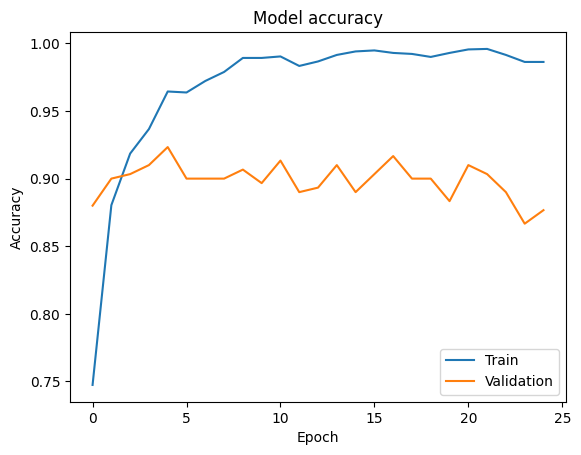

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

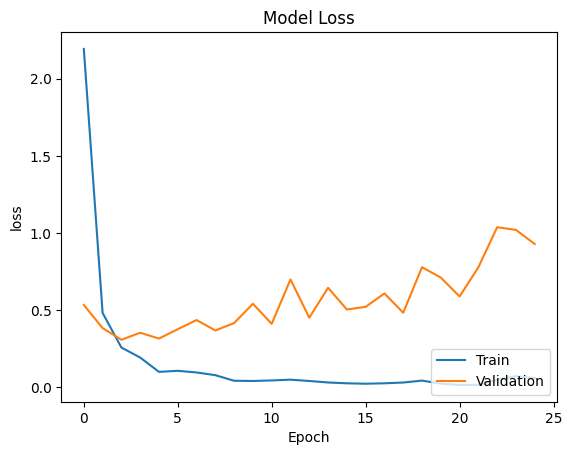

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()